## Lab 1: Getting data from API's

A great source of data and Pandas practice is getting data from the Internet. It is not going to come in a .csv file, though: It will be a stream of records, typically in XML (eXtensible Mark-up Language) or JSON (JavaScript Object Notation) format.

We'll look at a very simple API and some useful code chunks for getting and analyzing data, and then you'll take a look at the APIs available from the Federal government as the main work for your lab.


## API Queries

The core programming skill of the activity is to learn to query an online Application Programmer Interface (API). It is a similar experience to browsing the Internet, and initial results can be displayed the web browser. When visiting a web page, the address bar typically contains something like
$$
\texttt{https://} \underbrace{\texttt{www.}}_{\text{World Wide Web subdomain}} \texttt{domain}. \underbrace{\texttt{tld}}_{\text{Top level domain}},
$$
where the https:// specifies the protocol, www. specifies the world-wide-web subdomain, the domain is the entity, and the top-level domain .tld is typically something like .com or .gov, but is increasingly varied as ICANN releases more TLD's into circulation.

With an online API, the user instead enters a url that goes directly to an API subdomain
$$
\texttt{https://} \underbrace{\texttt{api.}}_{\text{Application programmer interface}} \texttt{domain.tld}/ \texttt{(the query)}
$$
or accesses REST services as
$$
\texttt{https://www.domain.tld} \underbrace{\texttt{/REST}}_{\text{Accesses REST services}}/ \texttt{(the query)}
$$
This accesses data on the domain's servers and returns the result directly to the user.

The query itself is typically a string beginning with a question mark ?, followed by a series of expressions joined by ampersands &. For example,

`?ProductType=Phone\&Manufacturer=Apple`

passes a query requesting all records for which the product type is recorded as phone and the manufacturer is recorded as Apple. Some API's include date ranges and other, more complex requests.

To get started, a simple warm-up is to use the API from saferproducts.gov, which has a simple and intuitive structure for queries, and the results are simple enough to look at in the browser. Typing this in the address bar in a browser should yield about thirty records:

    https://www.saferproducts.gov/RestWebServices/Recall?format=json&ProductType=Phone  

with the first being, on this occasion:

    "RecallID": 7856,
    "RecallNumber": "16266",
    "RecallDate": "2016-09-15T00:00:00",
    "Description": "This recall involves the Samsung Galaxy Note7 smartphone sold before
    September 15, 2016. The recalled devices have a 5.7 inch screen and were sold in the
    following colors: black onyx, blue coral, gold platinum and silver titanium with a
    matching stylus. Samsung is printed on the top front of the phone and Galaxy Note7
    is printed on the back of the phone. To determine if your phone has been recalled,
    locate the IMEI number on the back of the phone or the packaging, and enter the IMEI
    number into the online registration site www.samsung.com or call Samsung toll-free
    at 844-365-6197.",
    "URL": "https://www.cpsc.gov/Recalls/2016/Samsung-Recalls-Galaxy-Note7-Smartphones",
    "Title": "Samsung Recalls Galaxy Note7 Smartphones Due to Serious Fire and Burn Hazards",
    "ConsumerContact": "Contact your wireless carrier or place of purchase, call Samsung
    toll-free at 844-365-6197 anytime, or go online at www.samsung.com.",
    "LastPublishDate": "2016-10-27T00:00:00"

The query itself in this case is:

    ?format=json&ProductType=Phone  

The quert requests all of the recalls in JavaScript Object Notation (json) format, where the `ProductType` variable is equal to `Phone`. In addition to `ProductType`, other options include:

    RecallID,
    RecallNumber,
    RecallDateStart,
    RecallDateEnd,
    RecallURL,
    LastPublishDateStart,
    LastPublishDateEnd,
    RecallTitle,
    ConsumerContact,
    RecallDescription,
    ProductName,
    ProductDescription,
    ProductModel,
    ProductType,
    InconjunctionURL,
    ImageURL,
    Injury,
    Manufacturer,
    Retailer,
    Importer,
    Distributor,
    ManufacturerCountry,
    UPC,
    Hazard,
    Remedy,
    RemedyOption

**1. Practice writing queries using the saferproducts.gov API and your web browser.**

In [10]:
?format=json&Manufacturer=Verizon

Object `format=json&Manufacturer=Verizon` not found.


 "RecallID": 3032,
    "RecallNumber": "05505",
    "RecallDate": "2004-10-28T00:00:00",
    "Description": "Kyocera Wireless Corp. Recall of Cell Phone Batteries Recall Alert U.S. Consumer Product Safety Commission Office of Information and Public Affairs Washington, DC 20207 October 28, 2004 Alert #05-505 CPSC, Kyocera Wireless Corp. Announce Recall of Cell Phone Batteries The following product safety recall was conducted voluntarily by the firm in cooperation with the CPSC. Consumers should stop using recalled products immediately unless otherwise instructed. It is illegal to resell or attempt to resell a recalled consumer product. Name of Product: Batteries in Kyocera Wireless Corp. Cell Phones Units: About 1 million  Manufacturer: Hecmma Group, of El Paso, Texas Distributor: Kyocera Wireless Corp., of San Diego, Calif. Hazard: Some of the cell phone batteries supplied by the battery manufacturer may be counterfeit. This can cause the batteries to short-circuit, overheat and pose burn hazard to consumers. Incidents/Injuries: Kyocera has received 14 reports of battery failures, resulting in smoke and minor property damage. Two minor burn injuries have been reported. Description: The recalled batteries are included in Kyocera Slider, K400, and 3200 Series cell phones. Below is additional information about the cell phones and recalled batteries: Cell Phone Model Name Cell Phone Model Number Battery Model Numbers Battery Description Slider Series SE44/SE47 CV90-L305N-01 CV90-L305P-01 CV90-L305T-01 CV90-L349T-01 Battery has the Kyocera name printed in red and black along with the model number K400 Series \"Phantom\" \"Blade\" \"Rave\" KE413 KE433 KE/KX414 KE/KX424 KE/KX434 CV90-K3040-03 CV90-K3040-09 CV90-K3040-10 CV90-K3040-11 Battery has the Kyocera name printed in red and white along with the model number 3200 Series 3225 3250 (Appears above or below phone display) CV90-K3040-03 CV90-K3040-09 CV90-K3040-10 CV90-K3040-11 Battery has the Kyocera name printed in red and white along with the model number Sold at: ALLTEL, Virgin Mobile, Cricket Communications, MetroPCS, US Cellular and Verizon Wireless stores nationwide; telemarketing retailers; various Web sites; and regional phone carriers sold the cell phones with the recalled batteries. The 3200 Series and K400 Series phones were sold from December 2003 to September 2004 for between $30 and $100. Slider Series phones were sold from May 2004 to September 2004 for between $30 and $170. The recalled batteries were also sold separately during the same periods for between $30 and $60. Manufactured In: Made in China, assembled in Mexico. Remedy: Consumers should immediately stop using the recalled batteries in their cell phones. Kyocera will contact consumers directly to arrange for delivery of a free replacement battery. If consumers with recalled batteries are not contacted by Kyocera, they should call the company to receive a free replacement battery. The batteries should be stored in an environment with non-flammable materials. Consumer Contact: Call Kyocera Wireless Corp. toll-free at (866) 559-3882 between 6 a.m. and 6 p.m. PT Monday through Friday, or request a replacement battery online at www.kyocera-wireless.com Media Contact: John Chier at (858) 882-3543. Slider Series K400 Series 3200 Series Slider Series Battery and Affected Product Codes 3200 and K400 Series Battery and Affected Product Codes",
    "URL": "https://www.cpsc.gov/Recalls/2005/CPSC-Kyocera-Wireless-Corp-Announce-Recall-of-Cell-Phone-Batteries-",
    "Title": "Kyocera Wireless Corp. Recall of Cell Phone Batteries",
    "ConsumerContact": null,
    "LastPublishDate": "2014-05-23T00:00:00",[link text](https://)

In [11]:
?format=json&Hazard=Heat

Object `format=json&Hazard=Heat` not found.


"RecallID": 9167,
"RecallNumber": "22016",
"RecallDate": "2021-11-03T00:00:00",
"Description": "The recall involves propane and natural gas water heaters in 40, 50, and 75 gallon capacities. The recalled water heaters are white with a red \"Giant\" logo decal on the front. The water heaters have a nameplate near the Emerson gas control valve with the following model number ranges. UG40-38LFPV2-P1U-US, UG40-40LFPV2-N1U-US, UG50-38LFPV2-P1U-US, UG50-38LFPV2-P2U-US, UG50-38TFPDV1-N2U-US, UG50-40LFPV2-N1U-US, UG50-40LFPV2-N2U-US, UG75-76MEPV1-N2U-US, UG75-76MEPV1-P2U-US. The control valves are black with a white \"Emerson\" logo on the front.  The Emerson control valve model numbers and date code are located on a label on the right-hand side of the bracket holding the Emerson control valve to the gas water heater.  The recalled control valve model numbers are 37H73A-301P1 (natural gas) and 37H74A-301P1 (propane) with a date code between 1821 and 1839.",
"URL": "https://www.cpsc.gov/Recalls/2022/Usines-Giant-Factories-Recalls-Gas-Water-Heaters-with-Emerson-Control-Valves-Due-to-Risk-of-Carbon-Monoxide-Poisoning",
"Title": "Usines Giant Factories Recalls Gas Water Heaters with Emerson Control Valves Due to Risk of Carbon Monoxide Poisoning",
"ConsumerContact": "Giant at 800 363-9354 from 8 a.m. to 5 p.m. ET Monday through Thursday and 8 a.m. to 3 p.m. ET on Friday, or e-mail at recall@giantinc.com. or online at www.giantinc.com then click on \"Recall Information\" located at the bottom of the page, or click on https://giantinc.com/en/recall-information.",
"LastPublishDate": "2021-11-03T00:00:00",

## Accessing API's with Python

Anytime you use a computer to access resources on the Internet, you will likely run into problems. There are many options, but two with low coding overhead: The `requests` and `urrlib.requests` packages.

The following code chunk uses the `requests` package to get the same kind of data that was being displayed in the browser, but in an interactive Python session:

    import requests
    url = 'https://www.saferproducts.gov/RestWebServices/' # Location of the API
    query = 'Recall?format=json&ProductType=Exercise' # The query
    header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0)
        Gecko/20100101 Firefox/124.0'} # The user-agent to avoid being blocked
    raw = requests.get(url+query,headers=header) # Query the database
    data = raw.json() # Convert data from json to dictionary

To make the code easier to read, it separates the url and the query into two different strings, then concatenates them in the GET request. This makes it easier to edit the query, as well as suggests a simple way to loop over a number of queries that might be sent to the same API.

Many resources are designed to block access from particular kinds of users. In order to circumvent these obstacles, you can specify a `header` dictionary that presents the query to the server as coming from a hypothetical and common user. In this case, the header presents the query as coming from a Firefox browser from a Windows computer, rather than something like `python-requests/3.12.1`. This problem appears generally in scraping data from the web, and can grind the process to a halt. For whatever reason, I have been blocked and gotten 403 errors with the `requests` package, which motivated me to prepare a second alternative that seems more robust:

    import urllib.request
    import json
    url = 'https://www.saferproducts.gov/RestWebServices/' # Location of the API
    query = 'Recall?format=json&ProductType=Exercise' # The query
    response = urllib.request.urlopen(url+query)
    response_bytes = response.read()
    data = json.loads(response_bytes) # Convert response to json
    response.close()

This is a bit more code and some steps are a bit less human-friendly, but seems to work a bit more reliably than `requests`.

**2. Practice with the saferproducts.gov API and the above code in a notebook to see how API's work, in general.**

In [ ]:
import requests
url = 'https://www.saferproducts.gov/RestWebServices/'
query = 'Recall?format=json&Hazard=Heat'
header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
raw = requests.get(url+query,headers=header)
data = raw.json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
import urllib.request
import json
url = 'https://www.saferproducts.gov/RestWebServices/'
query = 'Recall?format=json&Manufacturer=Verizon'
response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes)
response.close()

In [ ]:
data

[{'RecallID': 3032,
  'RecallNumber': '05505',
  'RecallDate': '2004-10-28T00:00:00',
  'Description': 'Kyocera Wireless Corp. Recall of Cell Phone Batteries Recall Alert U.S. Consumer Product Safety Commission Office of Information and Public Affairs Washington, DC 20207 October 28, 2004 Alert #05-505 CPSC, Kyocera Wireless Corp. Announce Recall of Cell Phone Batteries The following product safety recall was conducted voluntarily by the firm in cooperation with the CPSC. Consumers should stop using recalled products immediately unless otherwise instructed. It is illegal to resell or attempt to resell a recalled consumer product. Name of Product: Batteries in Kyocera Wireless Corp. Cell Phones Units: About 1 million  Manufacturer: Hecmma Group, of El Paso, Texas Distributor: Kyocera Wireless Corp., of San Diego, Calif. Hazard: Some of the cell phone batteries supplied by the battery manufacturer may be counterfeit. This can cause the batteries to short-circuit, overheat and pose burn h

## Wrangling the Data

Piping the data to Pandas is easy, because the preceding code chunk put the JSON data into a native Python dictionary, and the following converts it to a dataframe:

    df = pd.DataFrame.from_dict(data)

If the data is in raw XML or JSON format --- which might especially be true with other API's --- it would instead be \texttt{pd.read\_xml(data)} or \texttt{pd.read\_json(data)}. Ironing out these details in advance for other applications is a key part of the presentation for students, but having students resolve these issues as a component of group work or an assignment is a great way to help them mature as coding problem solvers by struggling with documentation and a well-defined problem.

Unfortunately, there aren't many non-text fields in the \texttt{www.saferproducts.gov} data. However, there are a few fields of interest that can be tabulated and discussed, such as RemedyOptions and ManufacturerCountries:

    df['RemedyOptions'].value_counts()

with output

    RemedyOptions
    []                                                                               139
    [{'Option': 'Repair'}]                                                            49
    [{'Option': 'Replace'}]                                                           12
    [{'Option': 'Refund'}]                                                             7
    [{'Option': 'Replace'}, {'Option': 'Repair'}]                                      4
    [{'Option': 'Refund'}, {'Option': 'Replace'}, {'Option': 'Repair'}]                1
    [{'Option': 'Replace'}, {'Option': 'Refund'}]                                      1
    [{'Option': 'Refund'}, {'Option': 'Repair'}]                                       1
    [{'Option': 'Label'}]                                                              1
    [{'Option': 'New Instructions'}, {'Option': 'Replace'}, {'Option': 'Refund'}]      1
    Name: count, dtype: int64

It's appropriate at this point to do some data cleaning, particularly by flattening dictionary entries. With response data that get converted from json to a dictionary, there are often values in the data frame that need to be flattened or unpacked. For example, some values are recorded as \texttt{ [$\{$'Country':'Canada'$\}$]}, or, worse, a dictionary with multiple entries: \texttt{[ $\{$ 'Option': 'Replace'$\}$, $\{$'Option': 'Repair'$\}$]  ] }. This can lead to problems when another package refuses to work with a lists of lists or doesn't know how to simplify a dictionary to data, and presents some conceptual questions when cleaning.

A simple script to recursively collapse the dictionary entries into a single string is:

    temp = df['RemedyOptions']
    clean_values = []
    for i in range(len(temp)):
        if len(temp[i])>0:
            values = []
            for j in range(len(temp[i])):
                values.append(temp[i][j]['Option'] )
            clean_values.append(values)
        else:
            clean_values.append('')
    df['remedy'] = clean_values

**3. Convert this code chunk into a function you can reuse to flatten dictionaries, or explain clearly the problems you run into while attempting to do so. Make some tables or plots.**


In [ ]:
import pandas as pd


In [ ]:
df=pd.DataFrame.from_dict(data)

In [ ]:
df['Manufacturers'].value_counts()

,count
Manufacturers,
"[{'Name': 'Kyocera Wireless', 'CompanyID': ''}, {'Name': 'Hecmma Group', 'CompanyID': ''}, {'Name': 'ALLTEL', 'CompanyID': ''}, {'Name': 'Virgin Mobile', 'CompanyID': ''}, {'Name': 'Cricket Communications', 'CompanyID': ''}, {'Name': 'MetroPCS', 'CompanyID': ''}, {'Name': 'US Cellular', 'CompanyID': ''}, {'Name': 'Verizon Wireless', 'CompanyID': ''}]",1
"[{'Name': 'Verizon Wireless', 'CompanyID': ''}, {'Name': 'LG Infocomm', 'CompanyID': ''}]",1
"[{'Name': 'Kyocera Wireless', 'CompanyID': ''}, {'Name': 'Coslight International Group', 'CompanyID': ''}, {'Name': 'Verizon Wireless', 'CompanyID': ''}, {'Name': 'US Cellular', 'CompanyID': ''}, {'Name': 'ALLTEL', 'CompanyID': ''}]",1


In [ ]:
hazard = df['Hazards']

In [ ]:
temp = df['Manufacturers']
clean_values = []
for i in range(len(temp)):
  if len(temp[i])>0:
    values = []
    for j in range(len(temp[i])):
      values.append(temp[i][j]['Name'] )
    clean_values.append(values)
  else:
    clean_values.append('')
df['manufacturers'] = clean_values



In [ ]:
clean_values

[['Kyocera Wireless',
  'Hecmma Group',
  'ALLTEL',
  'Virgin Mobile',
  'Cricket Communications',
  'MetroPCS',
  'US Cellular',
  'Verizon Wireless'],
 ['Verizon Wireless', 'LG Infocomm'],
 ['Kyocera Wireless',
  'Coslight International Group',
  'Verizon Wireless',
  'US Cellular',
  'ALLTEL']]

In [ ]:
df['manufacturers'] = df['manufacturers'].astype(str)

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
var = 'manufacturers'



<Axes: xlabel='manufacturers', ylabel='Count'>

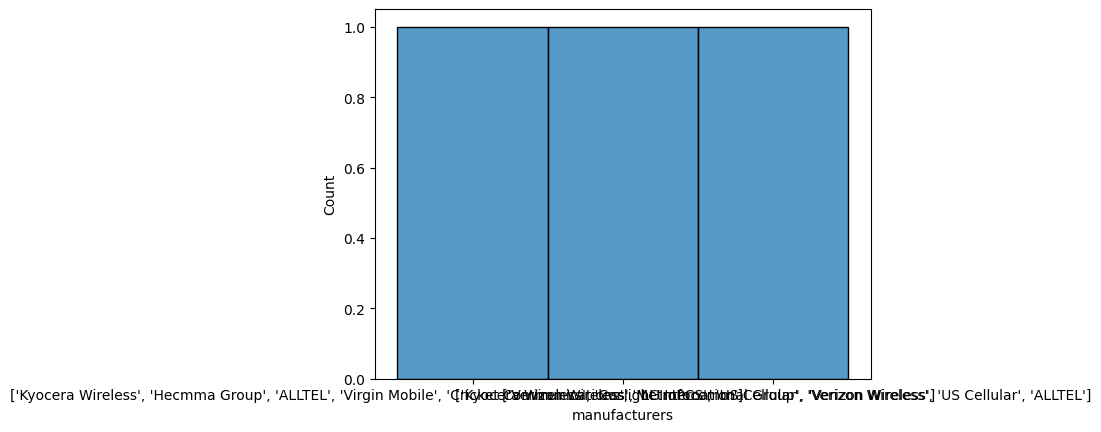

In [ ]:
sns.histplot(df[var])

## Dashboarding the Results (Optional)

To complete the pipeline from data to product, we can use \texttt{streamlit} to quickly convert Python code into a web page that can be accessed locally. This can be done with essentially three lines of code: An import statement, a $.title()$ method call to set the page title, and an $.write()$ call to push the results to the page. Although relatively static, completing this step serves a pedogogical and psychological purpose: It pivots the students to thinking about how to communicate results to an audience, and how the project could become an ongoing endeavor rather than a single analytical exercise.

The entire .py file to create the dashboard is

    import pandas as pd
    import requests
    import streamlit as st
    # Conduct analysis:
    url = 'https://www.saferproducts.gov/RestWebServices/Recall'
    query = '?format=json&RecallTitle=Gas'
    header = {'User-Agent':
              'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
    raw = requests.get(url+query,headers=header)
    data = raw.json()
    df = pd.DataFrame.from_dict(data)
    temp = df['RemedyOptions']
    clean_values = []
    for i in range(len(temp)):
        if len(temp[i])>0:
            values = []
            for j in range(len(temp[i])):
                values.append(temp[i][j]['Option'] )
            clean_values.append(values)
        else:
            clean_values.append('')
    df['remedy'] = clean_values
    remedy_counts = df['remedy'].value_counts()
    # Create streamlit output:
    st.title('Remedy Statistics')
    st.write(remedy_counts)

To create the web page, run the following at the command line:

    streamlit run remedy.py

This should convert the above analysis into a web page available from localhost.

**4. Produce your own table or plot, and output it to streamlit.**

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
import pandas as pd
import requests
import streamlit as st
import urllib.request
import json

# Conduct analysis:
url ='https://www.saferproducts.gov/RestWebServices/Recall'
apikey = '7ThkbjIxqYaSry2qfz5BKNXjFeaknIaoytkxD8Dr'
query ='?format=json&Manufacturer=Verizon'
header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0',
          'X-Api-Key': apikey}
raw = requests.get(url+query,headers=header)
response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes) # Convert response to json, because I would get the 403 code when using data = raw.json()
response.close()
df = pd.DataFrame.from_dict(data)
temp = df['Manufacturers']
clean_values = []
for i in range(len(temp)):
  if len(temp[i])>0:
    values = []
    for j in range(len(temp[i])):
      values.append(temp[i][j]['Name'] )
    clean_values.append(values)
  else:
    clean_values.append('')
df['manufacturers']= clean_values
manufacturer_counts = df['manufacturers'].value_counts()

# Create Streamlit Output
st.title('Manufacturer Statistics')
st.write(manufacturer_counts)






2024-09-20 05:10:39.562 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-20 05:10:39.744 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-09-20 05:10:39.748 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-20 05:10:39.775 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-20 05:10:39.778 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
!streamlit run manufacturers.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: manufacturers.py


## Other API Sources

Valuable and interesting Federal API resources are listed at:

    https://catalog.data.gov/dataset/?_res_format_limit=0&res_format=API

and in the future will likely easily be found at \texttt{data.gov}. Some highlights include:

- CDC WONDER API for Data Query Web Service: Includes death certificates with causes since approximately the 1990's.
- Comprehensive Housing Affordability Strategy (CHAS): Housing and Urban Development (HUD) maintains an API that provides Census data on housing problems and needs unavailable through other sources, including IPUMS.
- Federal Election Commission API: Provides historical and up to the minute campaign finance data.
- Toxic Release Inventory: Provided by the Environmental Protection Agency, this API documents the release and management of over 800 toxic substances, reported annually by privately owned facilities and the government.
- Petroleum Data, Prices: Provides prices of petroleum products and crude oil at weekly, monthly, and yearly time scales.
- Fair Market Rents Lookup tool: Fair Market Rents (FMRs) determine the value of housing vouchers for Section 8 renters. This API provides the FMR values and other measures of housing affordability.
- Annual Economic Surveys, Business Patterns: Surveys of businesses at the zip code level, tracking economic sentiment and activity.
- Food Access Research Atlas: Provides spatial data on food access and the availability of supermarkets within census tracts. Can be merged with census data to look at under-served populations and food deserts.
- National Oceanographic and Atmospheric Administration: Provides API access to data on real time weather and climate change projections.

Each of these API resources could either be the cornerstone of a project or a source of additional data. These data sources have a number of advantages: They're free, most of them can be accessed using the same API key, and most have similar documentation for how to write a query. This is ideal for students to iterate, experiment, and take risks, with little cost to failure.

In addition to government data, many commerical apps provide API access to developers and researchers. AirBnB, Amazon, Reddit, eBay, X, and many others maintain API access to develop third-party apps. These opportunities present many advantages: The data are larger, have more variety, and there are vastly many more cases. Building a third-party app that includes analytics could easily consume an entire semester and open a variety of applications in predictive analytics, natural language processing, and generative AI (e.g. predict which reviews are fake or real for Amazon for a product group like ``women's watches', and then make recommendations for different price points). While an exciting possibility, this can also raise a lot of problems: Some API's cost money or are rate-limited depending on a subscription, and others impose significant constraints on how the data can be used. In some cases, a more useful approach might be explicit web scraping using a package like BeautifulSoup or Selenium. For example, Craigslist has no API, but can easily and productively be scraped using BeautifulSoup.

**5. Pick an API, download some data, wrangle them, and produce some EDA results, as we did in the previous steps with the saferproducts.gov API; or, if you can't get it to work, document why. If you have the time and it's low cost, push the results to a streamlit page. If you have had enough, I recommend https://www.eia.gov/opendata/browser/electricity, since there is a friendly query builder that you can use to learn.**

In [1]:
import numpy as np
import pandas as pd
import urllib.request
import json
import matplotlib.pyplot as plt

In [5]:
url = 'https://api.eia.gov/v2/coal/market-sales-price/data/'
api_key = '7ThkbjIxqYaSry2qfz5BKNXjFeaknIaoytkxD8Dr'
query = f'?frequency=annual&data[0]=price&facets[stateRegionId][]=VA&start=2002&end=2022&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key={api_key}'
# added the api-key to the query and the f because it kept saying error 403 and the gemini AI that explains errors on colab said that this would fix it.
# I looked up what the f does and it says that it tells it that the api_key will be inserted where the {api_key} place holder is?
response = urllib.request.urlopen(url+query)
response_bytes = response.read()
Data = json.loads(response_bytes)
response.close()

dc = pd.DataFrame.from_dict(Data['response']['data'])
dc.to_csv('coal_data.csv')
print(dc.shape)
dc.head()

(62, 7)


,period,stateRegionId,stateRegionDescription,marketTypeId,marketTypeDescription,price,price-units
0,2022,VA,Virginia,CAP,Captive,w,dollars per short ton
1,2022,VA,Virginia,TOT,Total,211.57,dollars per short ton
2,2022,VA,Virginia,OM,Open Market,w,dollars per short ton
3,2021,VA,Virginia,CAP,Captive,w,dollars per short ton
4,2021,VA,Virginia,TOT,Total,120.5,dollars per short ton


<Axes: xlabel='period', ylabel='price'>

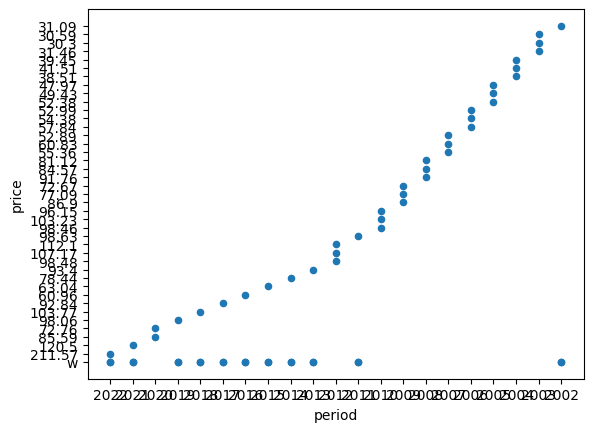

In [9]:
dc.plot.scatter(y='price',x='period')